# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from api_keys import weather_api_key 
import requests
from scipy.stats import linregress
import json
import os
import random
random.seed(17)

## Generate Cities List

In [2]:
## This random list was generated by the city list json file provied by openweather.
# with open("current_city_list_min.json", encoding='utf-8') as jsonfile:
#     city_json = json.load(jsonfile)
# nums = random.sample(range(len(city_json)), k=600)
# city_list=[]
# for i in nums:
#     city_list.append(city_json[i]['name'])
# city_list[0]

'Goias'

In [2]:
#install the citypy
!pip install citipy

In [2]:
#import citipy
from citipy import citipy 

In [5]:
# for loop to generate the city list(try 600)
city_list =[]
for i in range(0,600):
    random_lat = random.randint(-90, 90)
    random_lng = random.randint(-180, 180)
    city = citipy.nearest_city(random_lat,random_lng)
    city_list.append(city.city_name)
city_list

['rikitea',
 'cullman',
 'hilo',
 'ushuaia',
 'khatanga',
 'alekseyevsk',
 'rocha',
 'mataura',
 'new norfolk',
 'souillac',
 'isangel',
 'busselton',
 'toliary',
 'deputatskiy',
 'sangar',
 'belushya guba',
 'rikitea',
 'kaitangata',
 'talnakh',
 'catabola',
 'handwara',
 'rikitea',
 'meulaboh',
 'palabuhanratu',
 'sakhon nakhon',
 'yayva',
 'cabinda',
 'joshimath',
 'lata',
 'busselton',
 'la celia',
 'saint-philippe',
 'illoqqortoormiut',
 'bredasdorp',
 'castro',
 'grindavik',
 'antofagasta',
 'gao',
 'albany',
 'belushya guba',
 'hermanus',
 'port elizabeth',
 'ilulissat',
 'carnarvon',
 'ushuaia',
 'punta arenas',
 'kununurra',
 'ushuaia',
 'chagda',
 'hermanus',
 'vostok',
 'georgiyevskoye',
 'whitehorse',
 'pemba',
 'bathsheba',
 'ossora',
 'magui',
 'avarua',
 'barentsburg',
 'funtua',
 'taolanaro',
 'attawapiskat',
 'luderitz',
 'chokurdakh',
 'hami',
 'mahebourg',
 'olafsvik',
 'ushuaia',
 'bathsheba',
 'grand river south east',
 'rangoon',
 'khandbari',
 'vao',
 'esperance'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# unit for temperature
unit = 'imperial'
#base url
base_url = f'http://api.openweathermap.org/data/2.5/weather?units={unit}&appid={weather_api_key}&q='
# empty list 
city_name = []
lat=[]
lng=[]
maxtemp=[]
hum=[]
cloudiness=[]
ws=[]
country=[]
date=[]
# for loop to go thru the city list
i=1
for city in city_list:
    # try to get the city info based on name search
    try:
        data = requests.get(base_url+city).json()
        name = data['name']
        city_name.append(data['name'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        maxtemp.append(data['main']['temp_max'])
        hum.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        ws.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        print(f'Processing Record {i}: {name}')
        i = i+1
    except KeyError:
        print('City not found. Skipping...')
#generate the city list
df = pd.DataFrame({'City':city_name,'Lat':lat,'Lng':lng,'Max Temp':maxtemp,'Humidity':hum,'Cloudiness':cloudiness,'Wind Speed':ws,'Country':country,'Date':date})


Processing Record 1: Rikitea
Processing Record 2: Cullman
Processing Record 3: Hilo
Processing Record 4: Ushuaia
Processing Record 5: Khatanga
Processing Record 6: Alekseyevsk
Processing Record 7: Rocha
Processing Record 8: Mataura
Processing Record 9: New Norfolk
Processing Record 10: Souillac
Processing Record 11: Isangel
Processing Record 12: Busselton
City not found. Skipping...
Processing Record 13: Deputatsky
Processing Record 14: Sangar
City not found. Skipping...
Processing Record 15: Rikitea
Processing Record 16: Kaitangata
Processing Record 17: Talnakh
Processing Record 18: Catabola
City not found. Skipping...
Processing Record 19: Rikitea
Processing Record 20: Meulaboh
City not found. Skipping...
Processing Record 21: Sakon Nakhon
Processing Record 22: Yayva
Processing Record 23: Cabinda
Processing Record 24: Joshīmath
Processing Record 25: Lata
Processing Record 26: Busselton
Processing Record 27: La Celia
Processing Record 28: Saint-Philippe
City not found. Skipping...
Pro

In [30]:
# save the city info to csv
df.to_csv('../my_output_data/city_info.csv',index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# read the csv file
city_df = pd.read_csv('../my_output_data/city_info.csv')
city_df.shape

(559, 9)

In [8]:

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,73.20,79,0,14.09,PF,1602429512
1,Esperance,-33.87,121.90,51.80,100,75,4.70,AU,1602429512
2,Puerto del Rosario,28.50,-13.86,77.00,78,20,14.99,ES,1602429512
3,Mataura,-46.19,168.86,53.01,92,79,10.00,NZ,1602429512
4,Beringovskiy,63.05,179.32,30.78,97,99,18.30,RU,1602429513


In [9]:
# city info describe
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,7.814025,11.905277,59.718605,74.279070,52.023256,9.779732,1.602430e+09
std,41.146421,104.847940,18.851247,19.605997,38.325354,6.823953,7.866727e+01
min,-54.800000,-175.200000,12.040000,8.000000,0.000000,0.430000,1.602429e+09
25%,-28.775000,-70.920000,45.170000,64.000000,13.000000,5.820000,1.602430e+09
50%,3.070000,16.430000,60.800000,79.000000,68.000000,8.120000,1.602430e+09
75%,42.665000,114.120000,75.135000,88.000000,90.000000,12.750000,1.602430e+09
max,78.220000,179.320000,104.630000,100.000000,100.000000,38.030000,1.602430e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# NO cities that have humidity > 100%.
city_df.loc[city_df['Humidity']>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

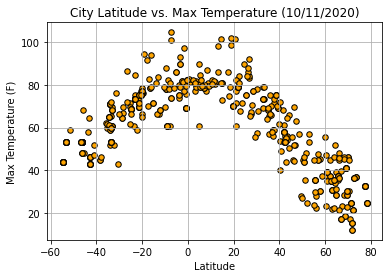

In [13]:
#scatter plot
city_df.plot.scatter('Lat','Max Temp',color='orange',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (10/11/2020)')
plt.grid()
plt.savefig('my_images/City Latitude vs Max Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

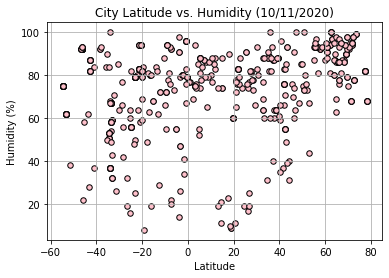

In [14]:
#scatter plot
city_df.plot.scatter('Lat','Humidity',color='pink',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/11/2020)')
plt.grid()
plt.savefig('my_images/City Latitude vs Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

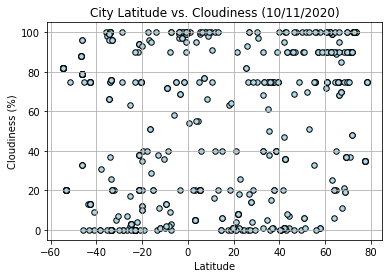

In [15]:
#scatter plot
city_df.plot.scatter('Lat','Cloudiness',color='lightblue',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/11/2020)')
plt.grid()
plt.savefig('my_images/City Latitude vs Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

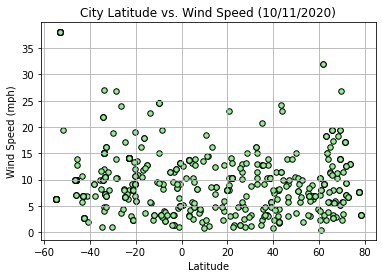

In [16]:
#scatter plot
city_df.plot.scatter('Lat','Wind Speed',color='lightgreen',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/11/2020)')
plt.grid()
plt.savefig('my_images/City Latitude vs Wind Speed.png')
plt.show()

## Linear Regression

In [17]:
# sepearate the df to north and south
north_city_df = city_df.loc[city_df['Lat']>=0]
sorth_city_df = city_df.loc[city_df['Lat']<0]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9013267598328668


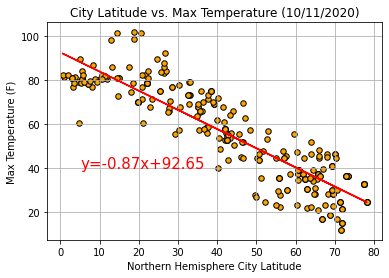

In [18]:
#scatter plot and linear regression
north_city_df.plot.scatter('Lat','Max Temp',color='orange',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Max Temperature (F)')
x_values=north_city_df['Lat']
y_values=north_city_df['Max Temp']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(5,40),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Max Temperature (10/11/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()


####  Colusion: Cities of northern hemisphere at the greater latitudes show lower max temperatures

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8195749279915592


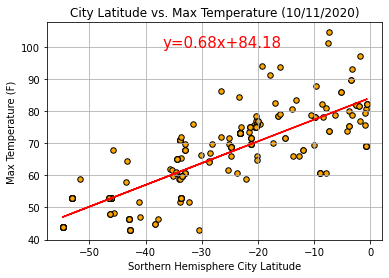

In [19]:
#scatter plot and linear regression
sorth_city_df.plot.scatter('Lat','Max Temp',color='orange',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Max Temperature (F)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Max Temp']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-37,100),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Max Temperature (10/11/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: Cities of southern hemisphere at the greater latitudes show higher max temperatures

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3406503560439325


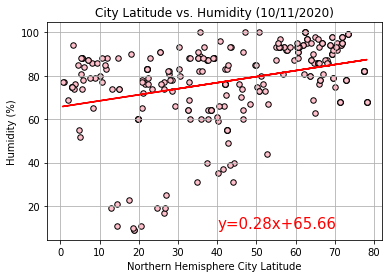

In [22]:
#scatter plot and linear regression
north_city_df.plot.scatter('Lat','Humidity',color='pink',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Humidity (%)')
x_values=north_city_df['Lat']
y_values=north_city_df['Humidity']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(40,10),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Humidity (10/11/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and humidity

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.003261298558243883


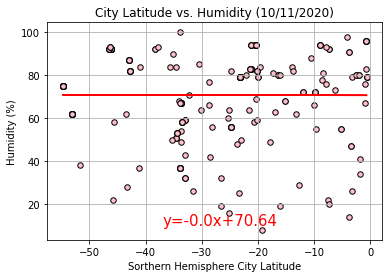

In [23]:
#scatter plot and linear regression
sorth_city_df.plot.scatter('Lat','Humidity',color='pink',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Humidity (%)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Humidity']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-37,10),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Humidity (10/11/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and humidity

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.34190571980556356


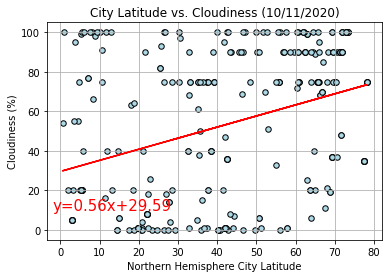

In [24]:
#scatter plot and linear regression
north_city_df.plot.scatter('Lat','Cloudiness',color='lightblue',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Cloudiness (%)')
x_values=north_city_df['Lat']
y_values=north_city_df['Cloudiness']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-2,10),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Cloudiness (10/11/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and cloudiness

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03103964065032914


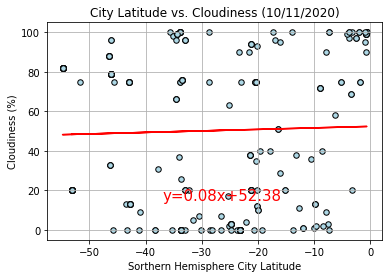

In [25]:
#scatter plot and linear regression
sorth_city_df.plot.scatter('Lat','Cloudiness',color='lightblue',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Cloudiness (%)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Cloudiness']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-37,15),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Cloudiness (10/11/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and cloudiness

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10165550187352881


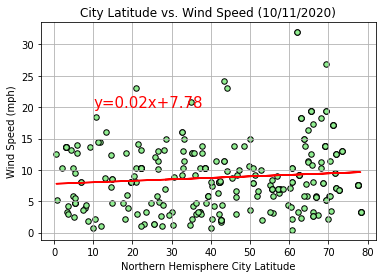

In [26]:
#scatter plot and linear regression
north_city_df.plot.scatter('Lat','Wind Speed',color='lightgreen',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Wind Speed (mph)')
x_values=north_city_df['Lat']
y_values=north_city_df['Wind Speed']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(10,20),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Wind Speed (10/11/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and wind speed

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.28480916733413114


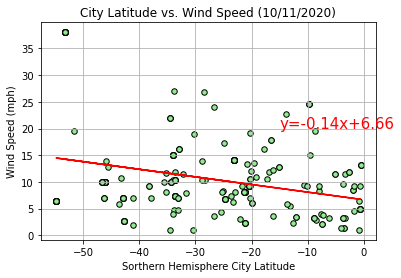

In [27]:
#scatter plot and linear regression
sorth_city_df.plot.scatter('Lat','Wind Speed',color='lightgreen',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Wind Speed (mph)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Wind Speed']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-15,20),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title('City Latitude vs. Wind Speed (10/11/2020)')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and wind speed